### Breast Cancer Detection using EfficientNet| Dataset used - CBIS-DDSM

## Import Required Libraries

In [1]:
import sys
import os
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import PIL 
import random
random.seed(100)
np.random.seed(100)

# Display some images
import matplotlib.image as mpimg

import tensorflow as tf

import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Import necessary TensorFlow libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Dropout
# from tensorflow.keras.applications.densenet import DenseNet169
import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import warnings

# Suppress all warnings globally
warnings.filterwarnings("ignore")

In [2]:
# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

# output will look something similar to this on a macOS system
# /Users/dionysialemonaki/Documents/my-projects/python-project

c:\Users\andre\Documents\Semillero


##  Data Acquisition

In [3]:
# Provide the correct path to the CSV file
csv_path = 'archive/csv/meta.csv'

# Read the CSV file into a DataFrame
df_meta = pd.read_csv(csv_path)

# Display the DataFrame
df_meta

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
...,...,...,...,...,...,...,...,...,...
6770,1.3.6.1.4.1.9590.100.1.2.424889390711092892018...,1.3.6.1.4.1.9590.100.1.2.416082235212771925836...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
6771,1.3.6.1.4.1.9590.100.1.2.627433012114953458354...,1.3.6.1.4.1.9590.100.1.2.763083562112003848332...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,1
6772,1.3.6.1.4.1.9590.100.1.2.250048723412722873040...,1.3.6.1.4.1.9590.100.1.2.354475681612412200004...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,1
6773,1.3.6.1.4.1.9590.100.1.2.323173986211744534717...,1.3.6.1.4.1.9590.100.1.2.185043095411645186738...,MG,cropped images,BREAST,1,CBIS-DDSM,1,1


In [4]:
dicom_data = pd.read_csv('archive/csv/dicom_info.csv')
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


### Exploratory Data Analysis

In [5]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [6]:
dicom_data.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [7]:
image_dir = 'archive/jpeg'
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.iloc[0]

'archive/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

In [8]:
full_mammogram_images.shape

(2857,)

In [9]:
cropped_images.iloc[0]

'archive/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg'

In [10]:
cropped_images.shape

(3567,)

In [11]:
roi_mask_images.iloc[0]

'archive/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg'

In [12]:
roi_mask_images.shape

(3247,)

In [13]:
full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()

for dicom in full_mammogram_images:
    # print(dicom)
    key = dicom.split("/")[2]
    # print(key)
    full_mammogram_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[2]
    cropped_dict[key] = dicom
for dicom in roi_mask_images:
    key = dicom.split("/")[2]
    roi_mask_dict[key] = dicom

In [14]:
next(iter((full_mammogram_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 'archive/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [15]:
sys.getsizeof(full_mammogram_dict)

147552

In [16]:
next(iter((cropped_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304',
 'archive/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg')

In [17]:
sys.getsizeof(cropped_images)

541312

In [18]:
next(iter((roi_mask_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138',
 'archive/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg')

In [19]:
sys.getsizeof(roi_mask_images)

492752

mass and calci csv read (train and test)

In [20]:
mass_train_data = pd.read_csv('archive/csv/mass_case_description_train_set.csv')
mass_test_data = pd.read_csv('archive/csv/mass_case_description_test_set.csv')
calc_train_data = pd.read_csv('archive/csv/calc_case_description_train_set.csv')
calc_test_data = pd.read_csv('archive/csv/calc_case_description_test_set.csv')

In [21]:
mass_train_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [22]:
# mass_data = mass_train_data.append(mass_test_data)
mass_test_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [23]:
calc_train_data.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [24]:
calc_test_data.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [25]:
# Count the number of benign and malignant cases in the training set
train_counts = mass_train_data['pathology'].value_counts()

# Count the number of benign and malignant cases in the test set
test_counts = mass_test_data['pathology'].value_counts()

# Display the results
print("Mass Training Set:")
print(train_counts)

print("\nMass Test Set:")
print(test_counts)

Mass Training Set:
pathology
MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: count, dtype: int64

Mass Test Set:
pathology
BENIGN                     194
MALIGNANT                  147
BENIGN_WITHOUT_CALLBACK     37
Name: count, dtype: int64


In [26]:
# Count the number of benign and malignant cases in the training set
train_counts = calc_train_data['pathology'].value_counts()

# Count the number of benign and malignant cases in the test set
test_counts = calc_test_data['pathology'].value_counts()

# Display the results
print("Calc Training Set:")
print(train_counts)

print("\nCalc Test Set:")
print(test_counts)

Calc Training Set:
pathology
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: count, dtype: int64

Calc Test Set:
pathology
BENIGN                     130
MALIGNANT                  129
BENIGN_WITHOUT_CALLBACK     67
Name: count, dtype: int64


Path fix for mass

In [27]:
def fix_image_path_mass(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [28]:
fix_image_path_mass(mass_train_data)

In [29]:
fix_image_path_mass(mass_test_data)

In [30]:
mass_train_data

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.34238619...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29673640...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29673640...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.35930832...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22795527...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22795527...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42912041...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42912041...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29536092...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.11513423...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.11513423...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.41052475...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39974253...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.38767005...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.94662217...
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.17408703...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.68321100...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.30354671...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.41255805...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.37531958...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.38732566...
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.15031142...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.31420275...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.23740515...


In [31]:
mass_test_data

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.24506314...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.30820586...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.30820586...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.85952214...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.38144014...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.38144014...
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22131189...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.21214302...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.21214302...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.23994906...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.15403043...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.15403043...
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.21508181...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.19959307...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.19959307...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,P_01825,2,RIGHT,MLO,1,mass,LOBULATED,MICROLOBULATED,3,BENIGN_WITHOUT_CALLBACK,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.40457730...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.40807699...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.40807699...
374,P_01833,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,5,MALIGNANT,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.35546433...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.18325073...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.18325073...
375,P_01865,2,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED,4,MALIGNANT,2,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.41306618...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.35830275...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.35830275...
376,P_01912,3,RIGHT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39580649...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29947931...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29947931...


Path fix for Calc

In [32]:
def fix_image_path_calc(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [33]:
fix_image_path_calc(calc_train_data)

In [34]:
calc_train_data

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.47414316...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39334401...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39334401...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.25059660...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29628120...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29628120...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22869962...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.31413587...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.31413587...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.10474341...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.40672562...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.28139749...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.28139749...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.21516492...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12646618...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12646618...
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39822795...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.14439547...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.14439547...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.83214077...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.17783378...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.17783378...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.11403071...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42069765...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42069765...


In [35]:
fix_image_path_mass(calc_test_data)

In [36]:
calc_test_data

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.41908163...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.18861395...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.24487699...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.36055008...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12629528...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,P_02464,2,RIGHT,MLO,1,calcification,FINE_LINEAR_BRANCHING,CLUSTERED,0,MALIGNANT,4,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.52619863...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...
322,P_02498,4,RIGHT,CC,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.35528667...,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....
323,P_02498,4,RIGHT,MLO,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.36621659...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...
324,P_02501,3,RIGHT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,0,MALIGNANT,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.23230853...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.27592370...,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....


### Data Cleaning

In [37]:
# check unique values in pathology column
mass_train_data.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [38]:
calc_train_data.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [39]:
mass_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [40]:
calc_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [41]:
# rename columns
mass_train = mass_train_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.34238619...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29673640...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29673640...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.35930832...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22795527...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22795527...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42912041...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42912041...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29536092...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.11513423...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.11513423...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.41052475...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366...


In [42]:
# rename columns
calc_train = calc_train_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                             'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

calc_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.47414316...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39334401...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39334401...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.25059660...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29628120...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29628120...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22869962...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.31413587...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.31413587...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.10474341...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.40672562...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.28139749...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.28139749...


In [43]:
# check for null values
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [44]:
calc_train.isnull().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality_id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image_file_path              0
cropped_image_file_path      0
ROI_mask_file_path           0
dtype: int64

In [45]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].fillna(method='bfill')
mass_train['mass_margins'] = mass_train['mass_margins'].fillna(method='bfill')

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [46]:
# fill in missing values using the backwards fill method
calc_train['calc_type'] = calc_train['calc_type'].fillna(method='bfill')
calc_train['calc_distribution'] = calc_train['calc_distribution'].fillna(method='bfill')

#check null values
calc_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [47]:
mass_test_data.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [48]:
calc_test_data.isnull().sum()

patient_id                  0
breast density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
calc type                   4
calc distribution          63
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [49]:
# check for column names in mass_test
print(mass_test_data.columns,'\n')

# renaming the columns
mass_test = mass_test_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# renamed columns
mass_test.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object') 



Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')

In [50]:
# check for column names in mass_test
print(calc_test_data.columns,'\n')

# renaming the columns
calc_test = calc_test_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# renamed columns
calc_test.columns

Index(['patient_id', 'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc type', 'calc distribution',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object') 



Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'calc_type', 'calc_distribution',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path'],
      dtype='object')

In [51]:
# fill in missing values using the backwards fill method
calc_test['calc_type'] = calc_test['calc_type'].fillna(method='bfill')
calc_test['calc_distribution'] = calc_test['calc_distribution'].fillna(method='bfill')
#check null values
calc_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

### Data Visualization

In [52]:
# quantitative summary of features
mass_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [53]:
calc_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1546.000000,1546.000000,1546.000000,1546.000000
mean,2.663648,1.415265,3.258732,3.411384
std,0.937219,0.903571,1.229231,1.179754
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.000000,4.000000,3.000000
75%,3.000000,1.000000,4.000000,4.000000
max,4.000000,7.000000,5.000000,5.000000


In [54]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [55]:
# check datasets shape
print(f'Shape of calc_train: {calc_train.shape}')
print(f'Shape of calc_test: {calc_test.shape}')

Shape of calc_train: (1546, 14)
Shape of calc_test: (326, 14)


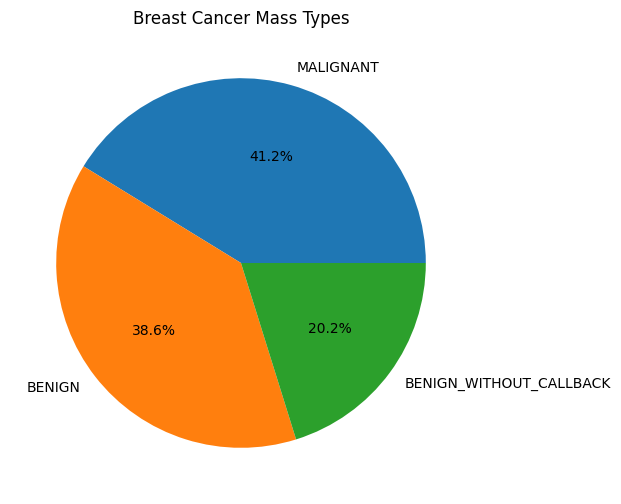

In [56]:
# pathology distributions
value = mass_train['pathology'].value_counts() + calc_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=12)
plt.show()

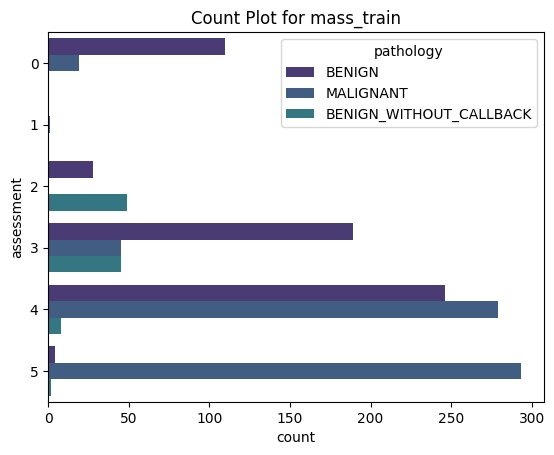

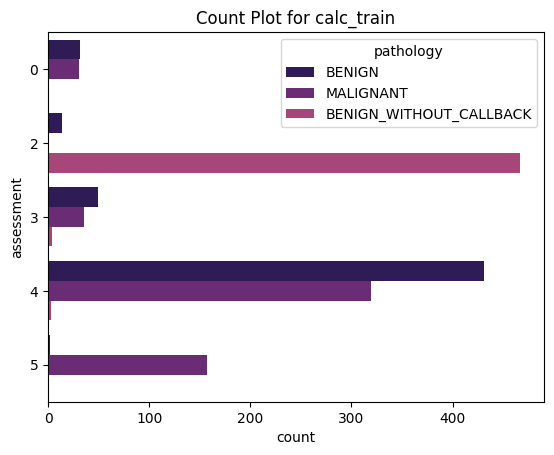

In [57]:
# Assuming mass_train and calc_train are your DataFrames

# Set the color palette for mass_train
mass_palette = sns.color_palette("viridis", n_colors=len(mass_train['assessment'].unique()))
sns.countplot(data=mass_train, y='assessment', hue='pathology', palette=mass_palette)
plt.title('Count Plot for mass_train')
plt.show()

# Set the color palette for calc_train
calc_palette = sns.color_palette("magma", n_colors=len(calc_train['assessment'].unique()))
sns.countplot(data=calc_train, y='assessment', hue='pathology', palette=calc_palette)
plt.title('Count Plot for calc_train')
plt.show()

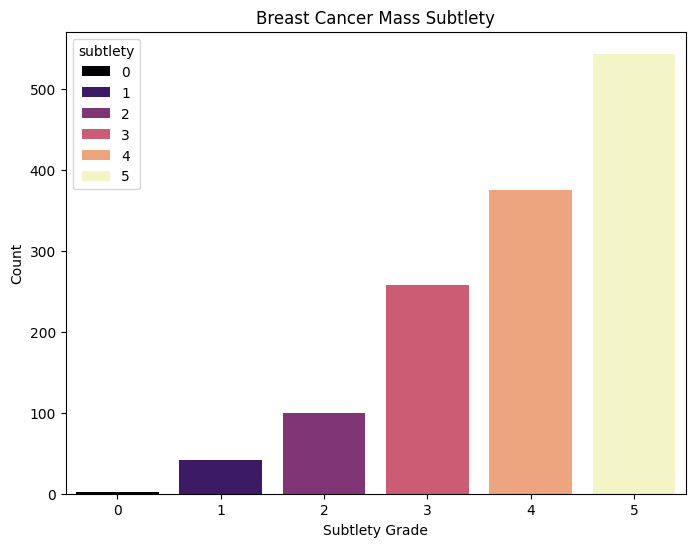

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=mass_train, x='subtlety', palette='magma', hue='subtlety')
plt.title('Breast Cancer Mass Subtlety', fontsize=12)
plt.xlabel('Subtlety Grade')
plt.ylabel('Count')
plt.show()

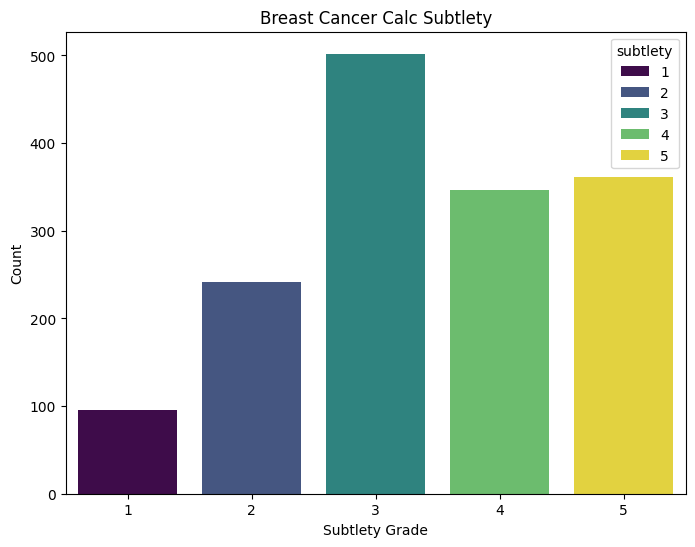

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=calc_train, x='subtlety', palette='viridis', hue='subtlety')
plt.title('Breast Cancer Calc Subtlety', fontsize=12)
plt.xlabel('Subtlety Grade')
plt.ylabel('Count')
plt.show()

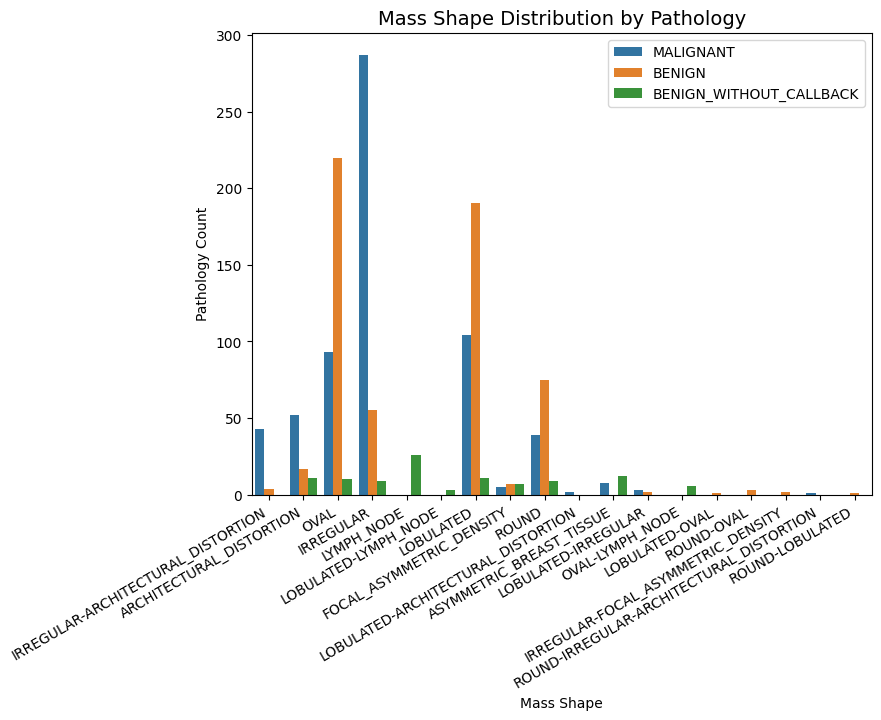

In [60]:
# view breast mass shape distribution against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='mass_shape', hue='pathology')
plt.title('Mass Shape Distribution by Pathology', fontsize=14)
plt.xlabel('Mass Shape')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Pathology Count')
plt.legend()
plt.show()

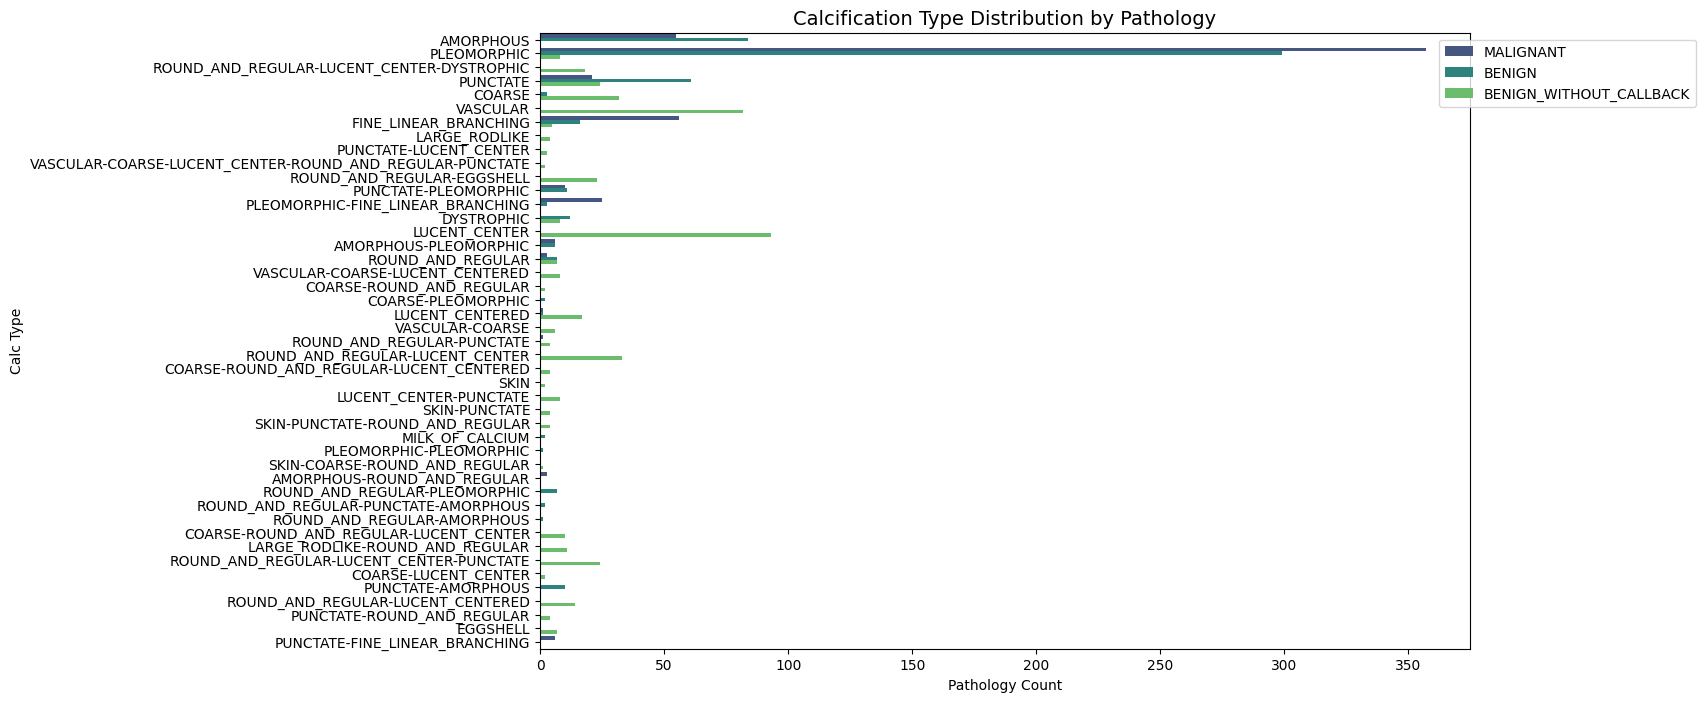

In [61]:
plt.figure(figsize=(12, 8))

sns.countplot(data=calc_train, y='calc_type', hue='pathology', palette='viridis')
plt.title('Calcification Type Distribution by Pathology', fontsize=14)
plt.xlabel('Pathology Count')
plt.ylabel('Calc Type')

# Adjust the rotation of the y-axis labels
plt.yticks(rotation=0, ha='right')

# Move the legend outside the plot for better visibility
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

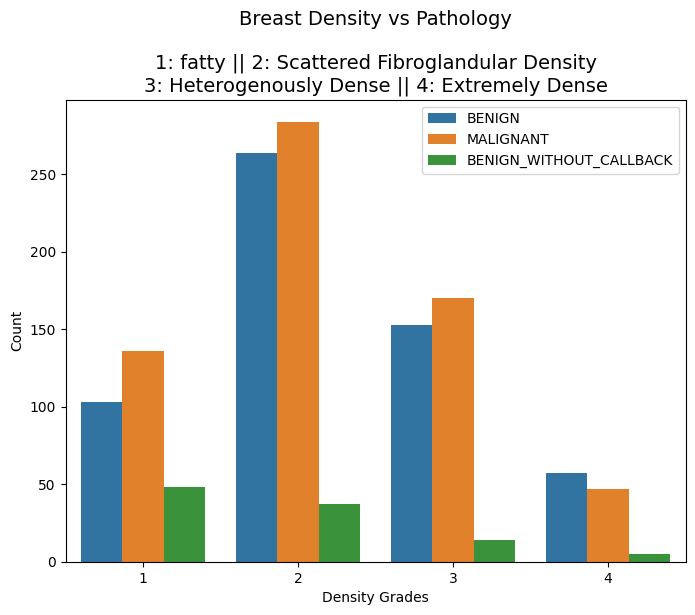

In [62]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()

plt.show()

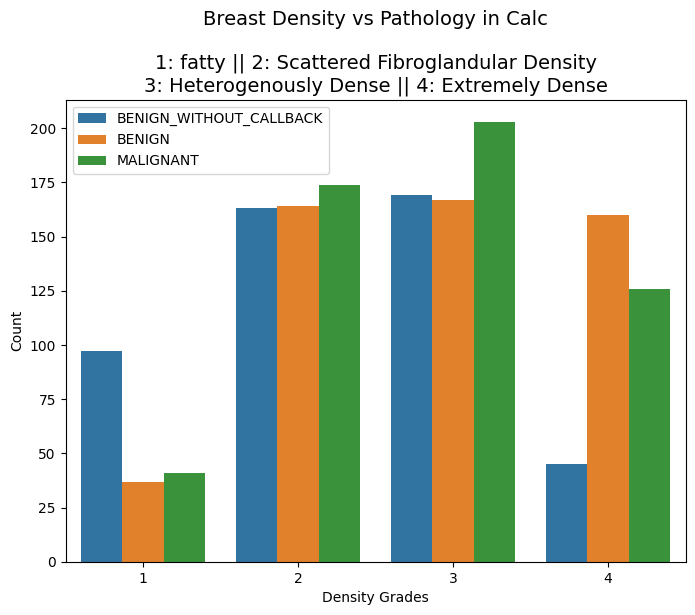

In [63]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(calc_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology in Calc\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()

plt.show()

In [64]:
mass_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.34238619...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29673640...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29673640...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.35930832...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22795527...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22795527...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42912041...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42912041...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29536092...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.11513423...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.11513423...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.41052475...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366...


In [65]:
calc_train.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.47414316...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39334401...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.39334401...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.25059660...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29628120...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29628120...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22869962...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.31413587...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.31413587...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.10474341...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279...
4,P_00008,1,LEFT,CC,1,calcification,ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.40672562...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.28139749...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.28139749...


Mass Training Dataset


Full Mammograms:

archive/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/1-207.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/1-250.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/1-056.jpg


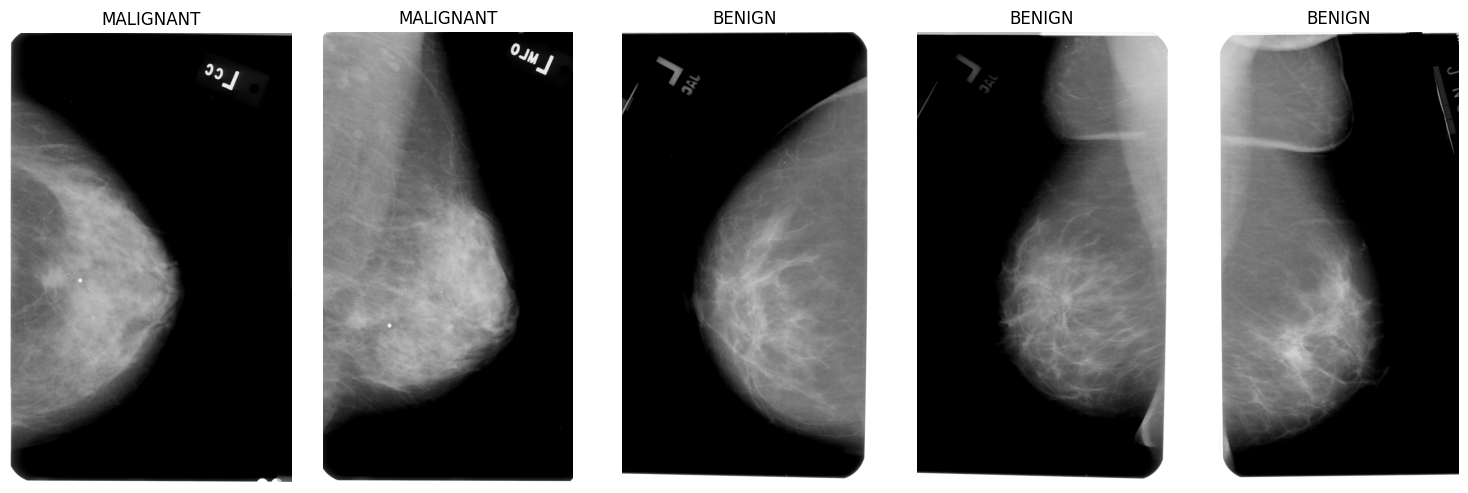

Cropped Mammograms:

archive/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/2-249.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/1-289.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/2-295.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/2-244.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/1-182.jpg


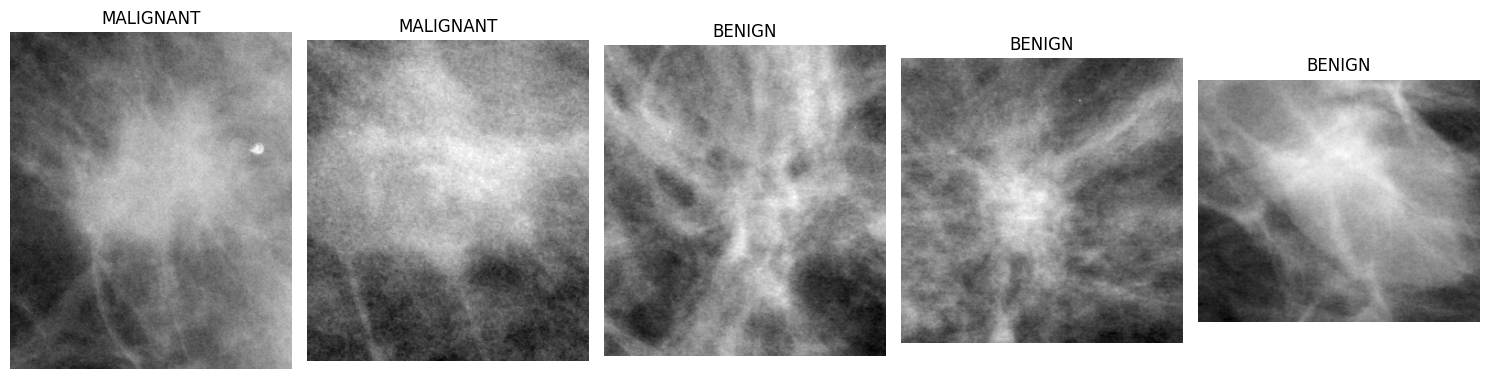

ROI Images:

archive/jpeg/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/1-250.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/2-288.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/1-296.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/1-245.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/2-183.jpg


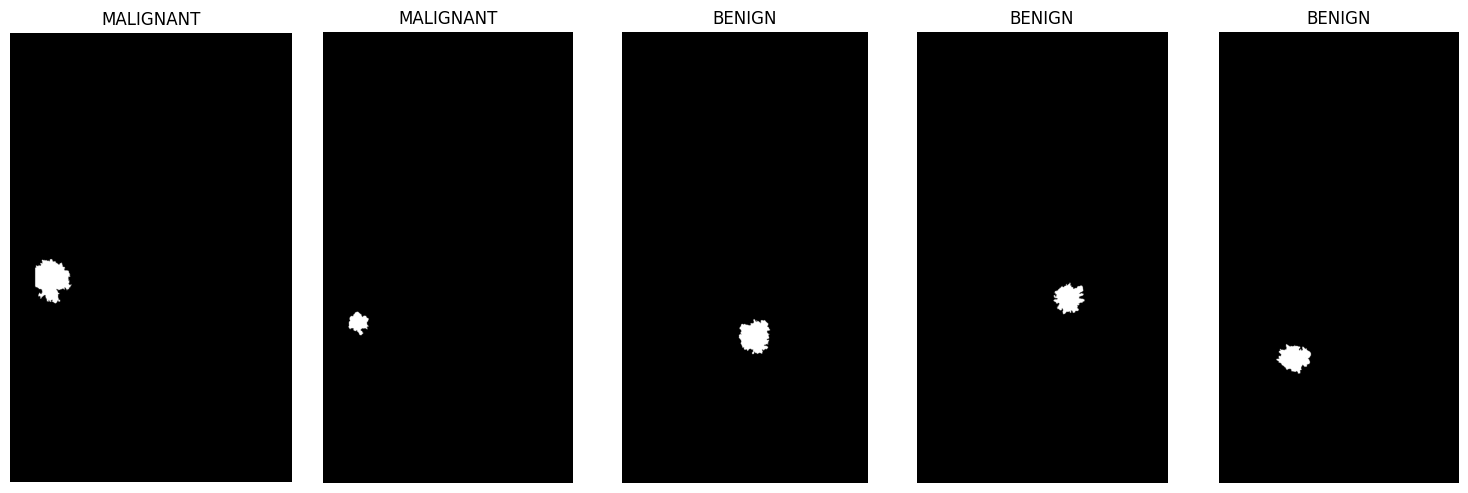

In [66]:
import matplotlib.image as mpimg

def display_images(column, number):
    """displays images in the dataset"""
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        print(image_path)
        # Check if the file exists
        if os.path.exists(image_path):
            image = mpimg.imread(image_path)
            ax = axes[index]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"{row['pathology']}")
            ax.axis('off')
        else:
            print(f"File not found: {image_path}")

    plt.tight_layout()
    plt.show()

print('Mass Training Dataset\n\n')
print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)
print('ROI Images:\n')
display_images('ROI_mask_file_path', 5)

Calcification Trianing Dataset


Full Mammograms:

archive/jpeg/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/1-188.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.250596608311207922527805669693579696727/1-189.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.228699627313487111012474405462022068297/1-190.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.104743410411133110629448544090466900446/1-191.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834/1-192.jpg


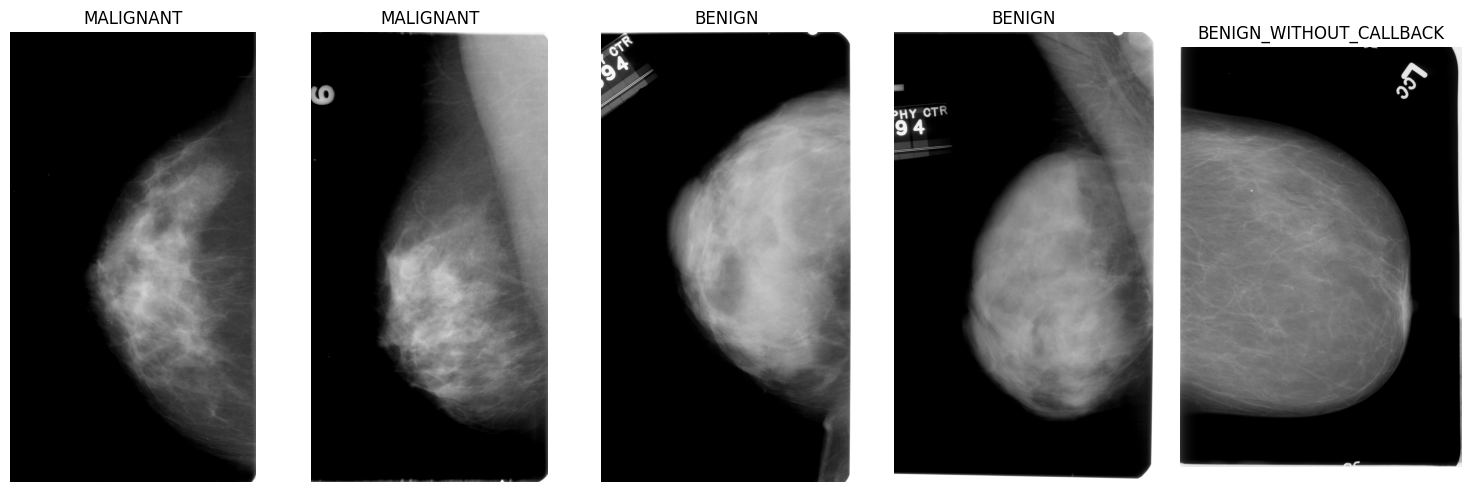

Cropped Mammograms:

archive/jpeg/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682/2-191.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/1-192.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041/1-193.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485/1-194.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/1-195.jpg


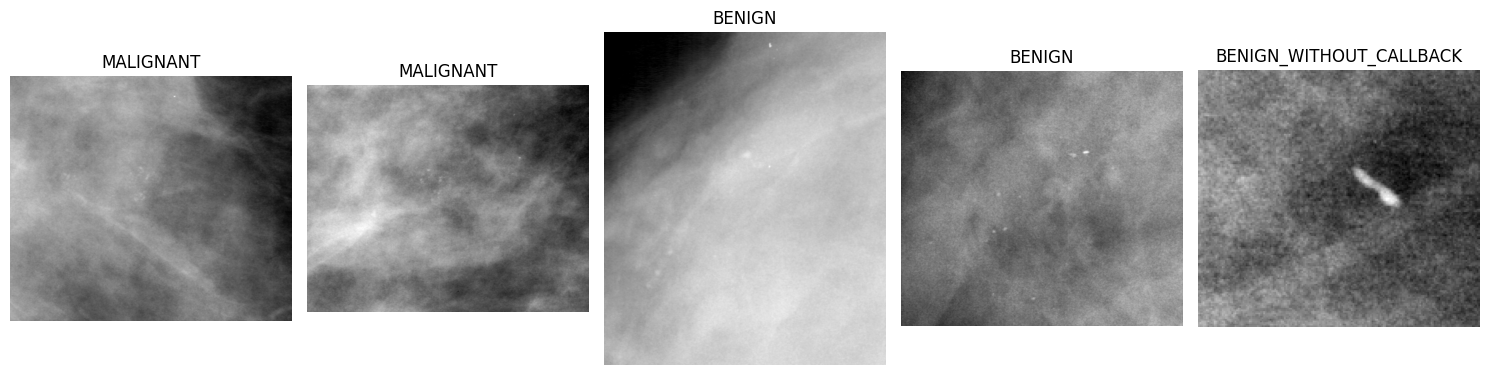

ROI Images:

archive/jpeg/1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682/1-107.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/2-108.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041/2-109.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485/2-110.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/2-111.jpg


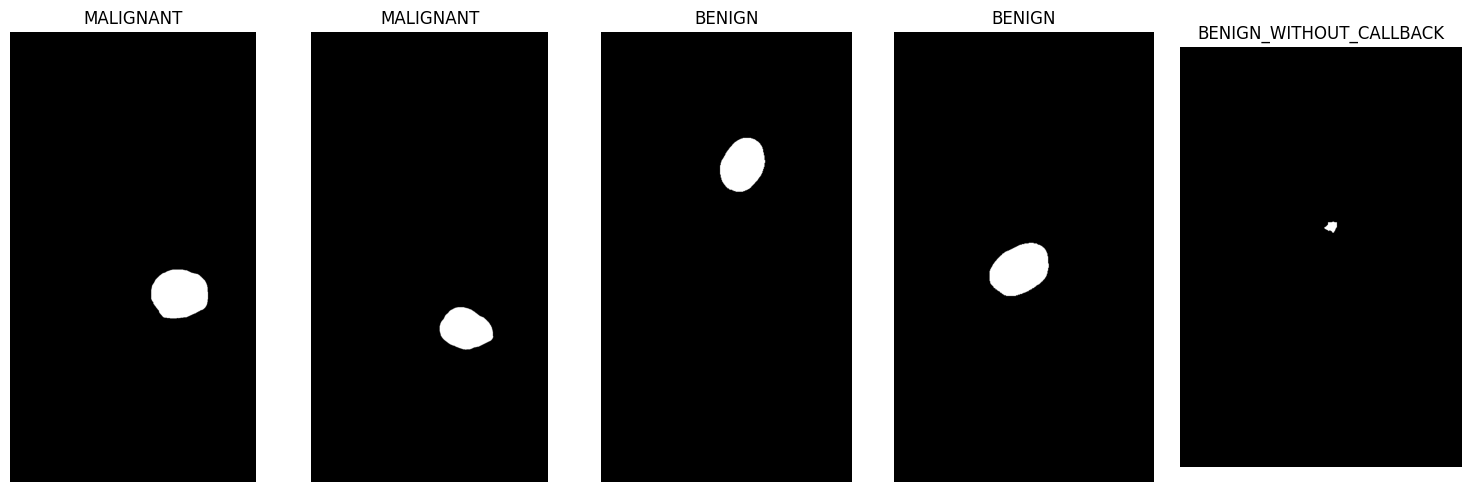

In [67]:
def display_images(column, number):
    """displays images in the dataset"""

    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    # Loop through all rows and display images
    for index, row in calc_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        print(image_path)
        # Check if the file exists
        if os.path.exists(image_path):
            image = mpimg.imread(image_path)
            ax = axes[index]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"{row['pathology']}")
            ax.axis('off')
        else:
            print(f"File not found: {image_path}")

    plt.tight_layout()
    plt.show()


print('Calcification Trianing Dataset\n\n')
print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)
print('ROI Images:\n')
display_images('ROI_mask_file_path', 5)

In [68]:
# Merge the datasets
mass_calc = pd.concat([mass_train, mass_test, calc_train, calc_test], axis=0)

# Define target size
target_size = (224, 224, 3)

In [69]:
mass_calc

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,calc_type,calc_distribution
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.34238619...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29673640...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29673640...,NaN,NaN
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.35930832...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22795527...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.22795527...,NaN,NaN
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42912041...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.42912041...,NaN,NaN
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.29536092...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.11513423...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.11513423...,NaN,NaN
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.41052475...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.12857366...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,P_02464,2,RIGHT,MLO,1,calcification,NaN,NaN,0,MALIGNANT,4,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.52619863...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...,FINE_LINEAR_BRANCHING,CLUSTERED
322,P_02498,4,RIGHT,CC,1,calcification,NaN,NaN,0,BENIGN,3,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.35528667...,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....,PUNCTATE,CLUSTERED
323,P_02498,4,RIGHT,MLO,1,calcification,NaN,NaN,0,BENIGN,3,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.36621659...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...,PUNCTATE,CLUSTERED
324,P_02501,3,RIGHT,CC,1,calcification,NaN,NaN,0,MALIGNANT,3,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.23230853...,archive/jpeg/1.3.6.1.4.1.9590.100.1.2.27592370...,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,PLEOMORPHIC,CLUSTERED


In [70]:
base_directory="c:/Users/andre/Documents/Semillero/archive/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg"
image = tf.io.read_file(base_directory)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
print("image: ",image)

image:  tf.Tensor(
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.59607846 0.59607846 0.59607846]
  [0.5882353  0.5882353  0.5882353 ]
  [0.5686275  0.5686275  0.5686275 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.5764706  0.5764706  0.5764706 ]
  [0.5686275  0.5686275  0.5686275 ]
  [0.5568628  0.5568628  0.5568628 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.58431375 0.58431375 0.58431375]
  [0.5764706  0.5764706  0.5764706 ]
  [0.5647059  0.5647059  0.5647059 ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.5764706  0.5764706  0.5764706 ]
  [0.5686275  0.5686275  0.5686275 ]
  [0.5647059  0.5647059  0.5647059 ]]

 [[1.         1.         1.        ]
  [1.         1.  

### Image Preprocessing

In [159]:
def image_processor(image_path, target_size, base_directory="c:\\Users\\andre\\Documents\\Semillero\\archive\\jpeg"):
    """Preprocess images for Inception V3 model with Gaussian filter and CLAHE"""

    # Check if a GPU is available
    """
    physical_devices = tf.config.list_physical_devices('GPU')
    if len(physical_devices) == 0:
        print("Warning: No GPU devices found. Using CPU.")
    else:
        # give equal memory growth to all the GPUs 
        for i in range(len(physical_devices)):
            tf.config.experimental.set_memory_growth(physical_devices[i], True)

    """

    absolute_image_path = os.path.abspath(image_path)

    # Count for skipped and processed images
    skipped_count = 0
    processed_count = 0

    # Check if the image path starts with the specified directory
    if not absolute_image_path.startswith(base_directory):
        skipped_count += 1
        print(f"La ruta {absolute_image_path} no comienza con {base_directory}")
        return None, skipped_count, processed_count
    
    # Read the image using TensorFlow for GPU acceleration
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=1)  # Leer en escala de grises
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)

    # Resize the image
    image = tf.image.resize(image, (target_size[0], target_size[1]))

    # Convertir la imagen de TensorFlow a formato de 8 bits sin signo
    image_uint8 = tf.image.convert_image_dtype(image, dtype=tf.uint8)
    image_numpy = image_uint8.numpy()
    

    # Aplicar CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_clahe = clahe.apply(image_numpy)


    """
    # Eliminar el fondo no informativo
    _, binary = cv2.threshold(image_clahe, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    mask = np.zeros_like(image_clahe)
    cv2.drawContours(mask, [max_contour], -1, 255, thickness=cv2.FILLED)
    image_no_bg = cv2.bitwise_and(image_clahe, image_clahe, mask=mask)

    # Filtrar el ruido con un filtro de mediana
    image_filtered = cv2.medianBlur(image_no_bg, 5)

    # Aplicar Unsharp Masking para mejorar la nitidez
    gaussian = cv2.GaussianBlur(image_filtered, (9, 9), 10.0)
    image_usm = cv2.addWeighted(image_filtered, 1.5, gaussian, -0.5, 0)
    """

    # Convertir de nuevo a formato de TensorFlow y normalizar
    image_usm_tf = tf.convert_to_tensor(image_clahe, dtype=tf.float32) / 255.0

    processed_count += 1

    return image_usm_tf, skipped_count, processed_count

In [158]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# Apply preprocessor to train data
result = mass_calc['image_file_path'].apply(lambda x: pd.Series(image_processor(x, target_size), index=['image_array', 'skipped_count', 'processed_count']))

# Extract processed images, skipped count, and processed count from the result
mass_calc[['processed_images', 'skipped_count', 'processed_count']] = result

# Filter out rows where processed_images is None
mass_calc = mass_calc.dropna(subset=['processed_images'])

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function '`anonymous-namespace'::CLAHE_Impl::apply'


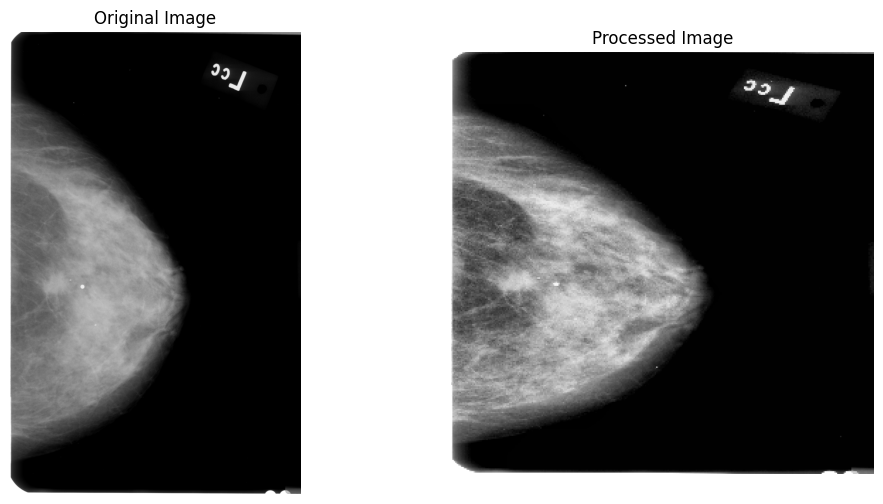

In [73]:
def display_images(original_image, processed_image):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(processed_image, cmap='gray')
    axes[1].set_title('Processed Image')
    axes[1].axis('off')
    
    plt.show()

# Path to the correct mammography image
image_path = 'c:/Users/andre/Documents/Semillero/archive/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg'

# Load the original image using TensorFlow
original_image = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=1)
original_image = tf.image.convert_image_dtype(original_image, dtype=tf.float32)

# Process the image
processed_image, skipped_count, processed_count = image_processor(image_path, (299, 299))

# Display the original and processed images
display_images(original_image.numpy().squeeze(), processed_image.numpy())

In [74]:
# Convert the processed_images column to an array
X_resized = np.array(mass_calc['processed_images'].tolist())

# Create a binary mapping
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}

# Apply class mapper to pathology column
mass_calc['labels'] = mass_calc['pathology'].replace(class_mapper)

# Check the number of classes in the dataset
num_classes = len(mass_calc['labels'].unique())

In [75]:
skipped_sum = mass_calc['skipped_count'].sum() 

print(f"Total skipped count: {skipped_sum}")

processed_count = mass_calc['processed_count'].sum() 

print(f"Total processed count: {processed_count}")

Total skipped count: 0.0
Total processed count: 3286.0


In [76]:
mass_calc['processed_count'].sum()

3286.0

In [77]:
print('Number of Classes:', num_classes)

Number of Classes: 2


In [78]:
mass_calc.shape

(3286, 20)

### Train Test Split

In [79]:
unique_labels_count = mass_calc['labels'].nunique()
print("Total number of unique labels:", unique_labels_count)

Total number of unique labels: 2


In [80]:
filled_labels_count = mass_calc['labels'].count()

print("Total number of filled labels:", filled_labels_count)

Total number of filled labels: 3286


In [81]:
print(len(X_resized))
print(len(mass_calc['labels'].values))

3286
3286


In [82]:
mass_calc = mass_calc.dropna(subset=['labels'])
print(mass_calc.columns)

Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path', 'calc_type',
       'calc_distribution', 'processed_images', 'skipped_count',
       'processed_count', 'labels'],
      dtype='object')


In [83]:
print(len(X_resized))
print(len(mass_calc['labels'].values))

3286
3286


In [84]:
"""
# Assuming mass_calc is your DataFrame and 'labels' is the column of interest
mass_calc = mass_calc.dropna(subset=['labels'])
print(mass_calc.columns)
"""

"\n# Assuming mass_calc is your DataFrame and 'labels' is the column of interest\nmass_calc = mass_calc.dropna(subset=['labels'])\nprint(mass_calc.columns)\n"

In [85]:
# Assuming X_resized is a NumPy array
# Remove corresponding rows from X_resized
X_resized = X_resized[mass_calc.index]

In [86]:
print(len(X_resized))
print(len(mass_calc['labels'].values))

3286
3286


In [87]:
# Split data into train, test, and validation sets 
X_train, X_temp, y_train, y_temp = train_test_split(X_resized, mass_calc['labels'].values, test_size=0.2, random_state=42, 
                                                    shuffle=True, stratify=mass_calc['labels'].values)

In [147]:
X_test = []
y_test = []

In [148]:
# Split data into train, test, and validation sets 
# X_train, X_temp, y_train, y_temp = train_test_split(X_resized, mass_calc['labels'].values, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, shuffle=True, stratify=y_temp)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

In [89]:
# Number of images in each set
num_train_images = X_train.shape
num_test_images = X_test.shape
num_val_images = X_val.shape

print("Number of images in the training set:", num_train_images)
print("Number of images in the testing set:", num_test_images)
print("Number of images in the validation set:", num_val_images)

Number of images in the training set: (2628, 224, 224)
Number of images in the testing set: (526, 224, 224)
Number of images in the validation set: (132, 224, 224)


In [90]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

print("Number of images in the training set:", X_train.shape)
print("Number of images in the testing set:", X_test.shape)
print("Number of images in the validation set:", X_val.shape)

Number of images in the training set: (2628, 224, 224, 1)
Number of images in the testing set: (526, 224, 224, 1)
Number of images in the validation set: (132, 224, 224, 1)


### Data Augmentation

In [91]:
# Data_augmentation
train_datagen = ImageDataGenerator(rotation_range=20,
                                   rescale=1.0 / 255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

In [92]:
# Apply augmentation to training data
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=32)

In [155]:

"""
from keras.applications import EfficientNetB2

base_model = EfficientNetB2(include_top=False, input_tensor=Input(shape=(224, 224, 3)), weights="imagenet",classes=2)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2096, activation='silu')(x)
x = BatchNormalization()(x)
predictions = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
"""
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()

# Agregar la primera capa convolucional
model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu', input_shape=(224, 224, 1)))

# Agregar la primera capa de MaxPooling
model.add(MaxPooling2D((3, 3), strides=(3, 3)))

# Agregar la segunda capa convolucional
model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu'))

# Agregar dos capas convolucionales más
for _ in range(2):
    model.add(Conv2D(64, (3, 3), activation='relu'))

# Agregar la segunda capa de MaxPooling
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Agregar tres capas convolucionales más
for _ in range(3):
    model.add(Conv2D(128, (3, 3), activation='relu'))

# Aplanar los mapas de características
model.add(Flatten())

# Agregar una capa completamente conectada (Fully Connected) con 1024 neuronas
#model.add(Dense(1024, activation='relu'))

# Agregar la capa de salida con 2 neuronas (para la clasificación binaria)
model.add(Dense(2, activation='softmax'))

In [156]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 111, 111, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 18, 18, 64)        18496     
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

## Model Report

* Number of layers - 2 additional layers over and above the EfficientNet2B 
    Needed Global Average Pooling Layer as we had removed the penultimate layer from the EfficientNet 2B model
    Needed last dense layer for 2 classes of output
* Number of units in each layer - 2096 and 2 units respectively
    Added 2096 units so that model learns the complex pattern
* Total number of trainable parameters - 2961650 - as given in the model summary


In [119]:
# Definir el learning rate inicial
initial_learning_rate = 0.01

# Compilar el modelo con el optimizador Adam y el learning rate inicial
model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [120]:
# Check the output shape of your model
print(model.output_shape)

(None, 2)


In [121]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
   monitor='val_accuracy',  # Monitor validation loss
   patience=5,  
   min_delta=0,  
   mode='min', 
   verbose=1,  
   restore_best_weights=True
)



In [122]:
# Continue with the rest of the code
history = model.fit(
   train_data_augmented,
   epochs=30,
   validation_data=(X_val, y_val),
   callbacks=[early_stopping]  # Add the EarlyStopping callback
)

Epoch 1/30
83/83 [==============================] - 10s 110ms/step - loss: 0.7865 - accuracy: 0.5860 - val_loss: 0.6768 - val_accuracy: 0.5909
Epoch 2/30
83/83 [==============================] - 9s 106ms/step - loss: 0.6793 - accuracy: 0.5875 - val_loss: 0.6784 - val_accuracy: 0.5909
Epoch 3/30
83/83 [==============================] - 9s 107ms/step - loss: 0.6795 - accuracy: 0.5875 - val_loss: 0.6766 - val_accuracy: 0.5909
Epoch 4/30
83/83 [==============================] - 9s 106ms/step - loss: 0.6794 - accuracy: 0.5875 - val_loss: 0.6776 - val_accuracy: 0.5909
Epoch 5/30
83/83 [==============================] - 9s 106ms/step - loss: 0.6783 - accuracy: 0.5875 - val_loss: 0.6791 - val_accuracy: 0.5909
Epoch 6/30
83/83 [==============================] - 10s 123ms/step - loss: 0.6786 - accuracy: 0.5875 - val_loss: 0.6778 - val_accuracy: 0.5909
Epoch 6: early stopping


### Plotting the results

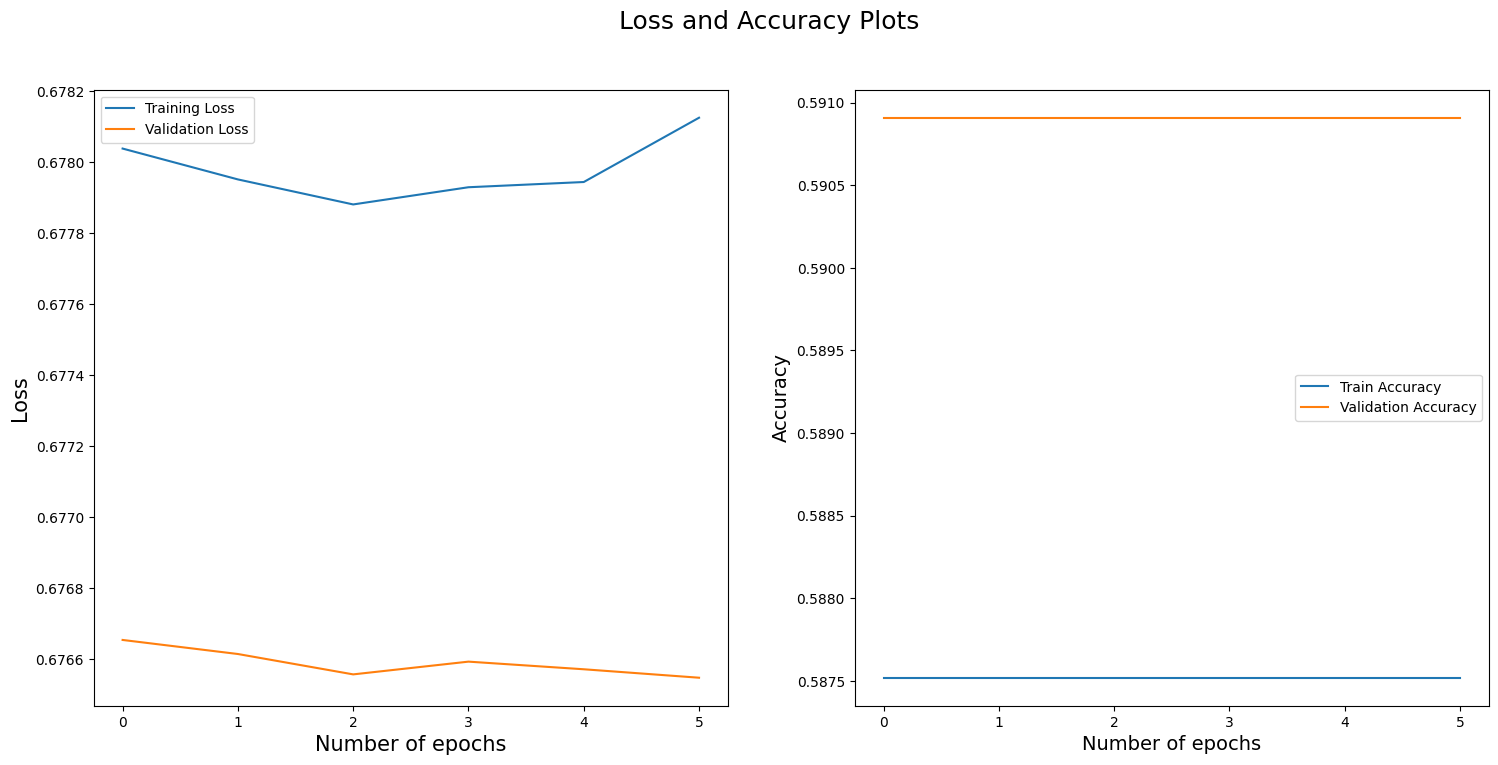

In [109]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

17/17 [==============================] - 2s 95ms/step


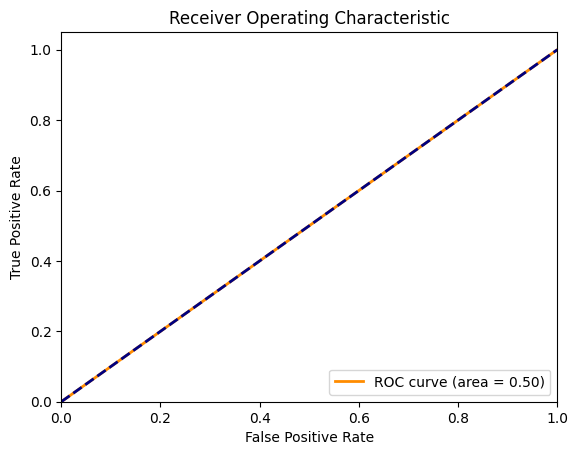

AUC: 0.50


In [123]:
from sklearn.metrics import roc_curve, auc

# Use the trained model to predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC: {roc_auc:.2f}')

In [124]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 1s 42ms/step - loss: 0.6782 - accuracy: 0.5875


[0.6781839728355408, 0.5874524712562561]

#### Test Accuracy = 58.74%
#### Test Loss = 0.677

### Confusion matrix for the testing dataset

17/17 [==============================] - 1s 41ms/step


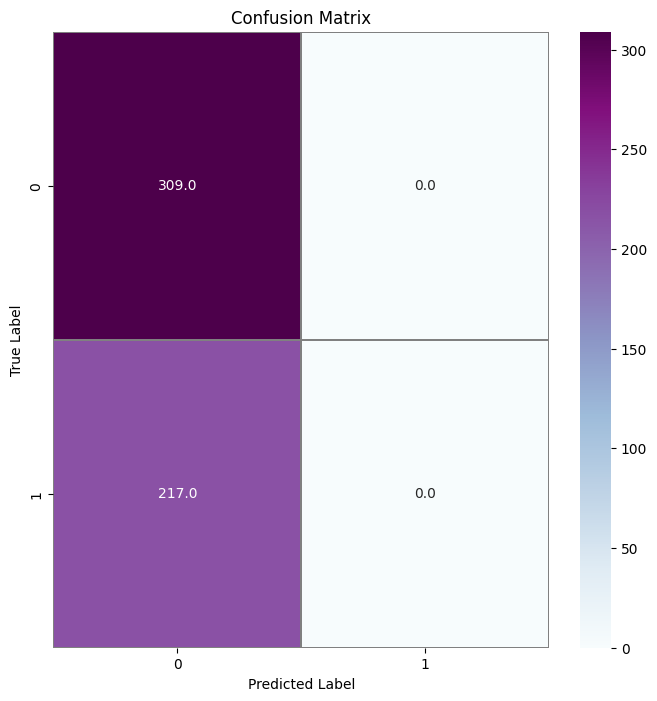

In [125]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [126]:

# Calculate metrics
accuracy = accuracy_score(Y_true, Y_pred_classes)
recall = recall_score(Y_true, Y_pred_classes)
precision = precision_score(Y_true, Y_pred_classes)
f1 = f1_score(Y_true, Y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Test Accuracy: 0.5875
Test Recall: 0.0000
Test Precision: 0.0000
Test F1 Score: 0.0000


In [127]:
history_dict = history.history

# plot training loss vs validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

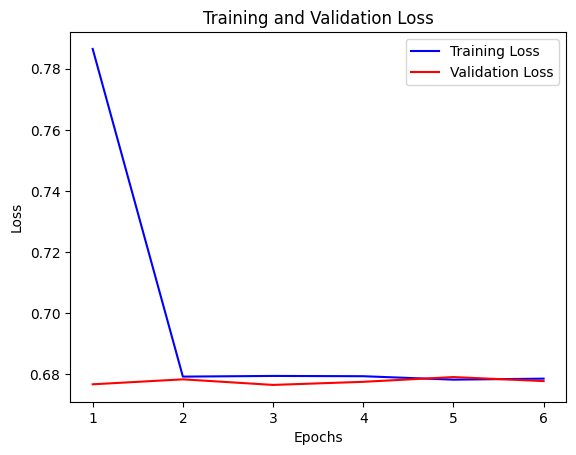

In [128]:
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

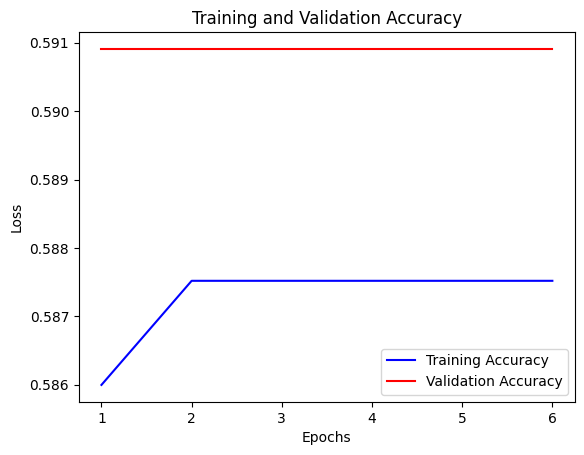

In [129]:
# plot training vs validation accuracy
val_acc_values = history_dict['val_accuracy']
acc = history_dict['accuracy']

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [149]:

y_test.shape

(526, 2)

In [150]:

X_test.shape

(526, 224, 224)

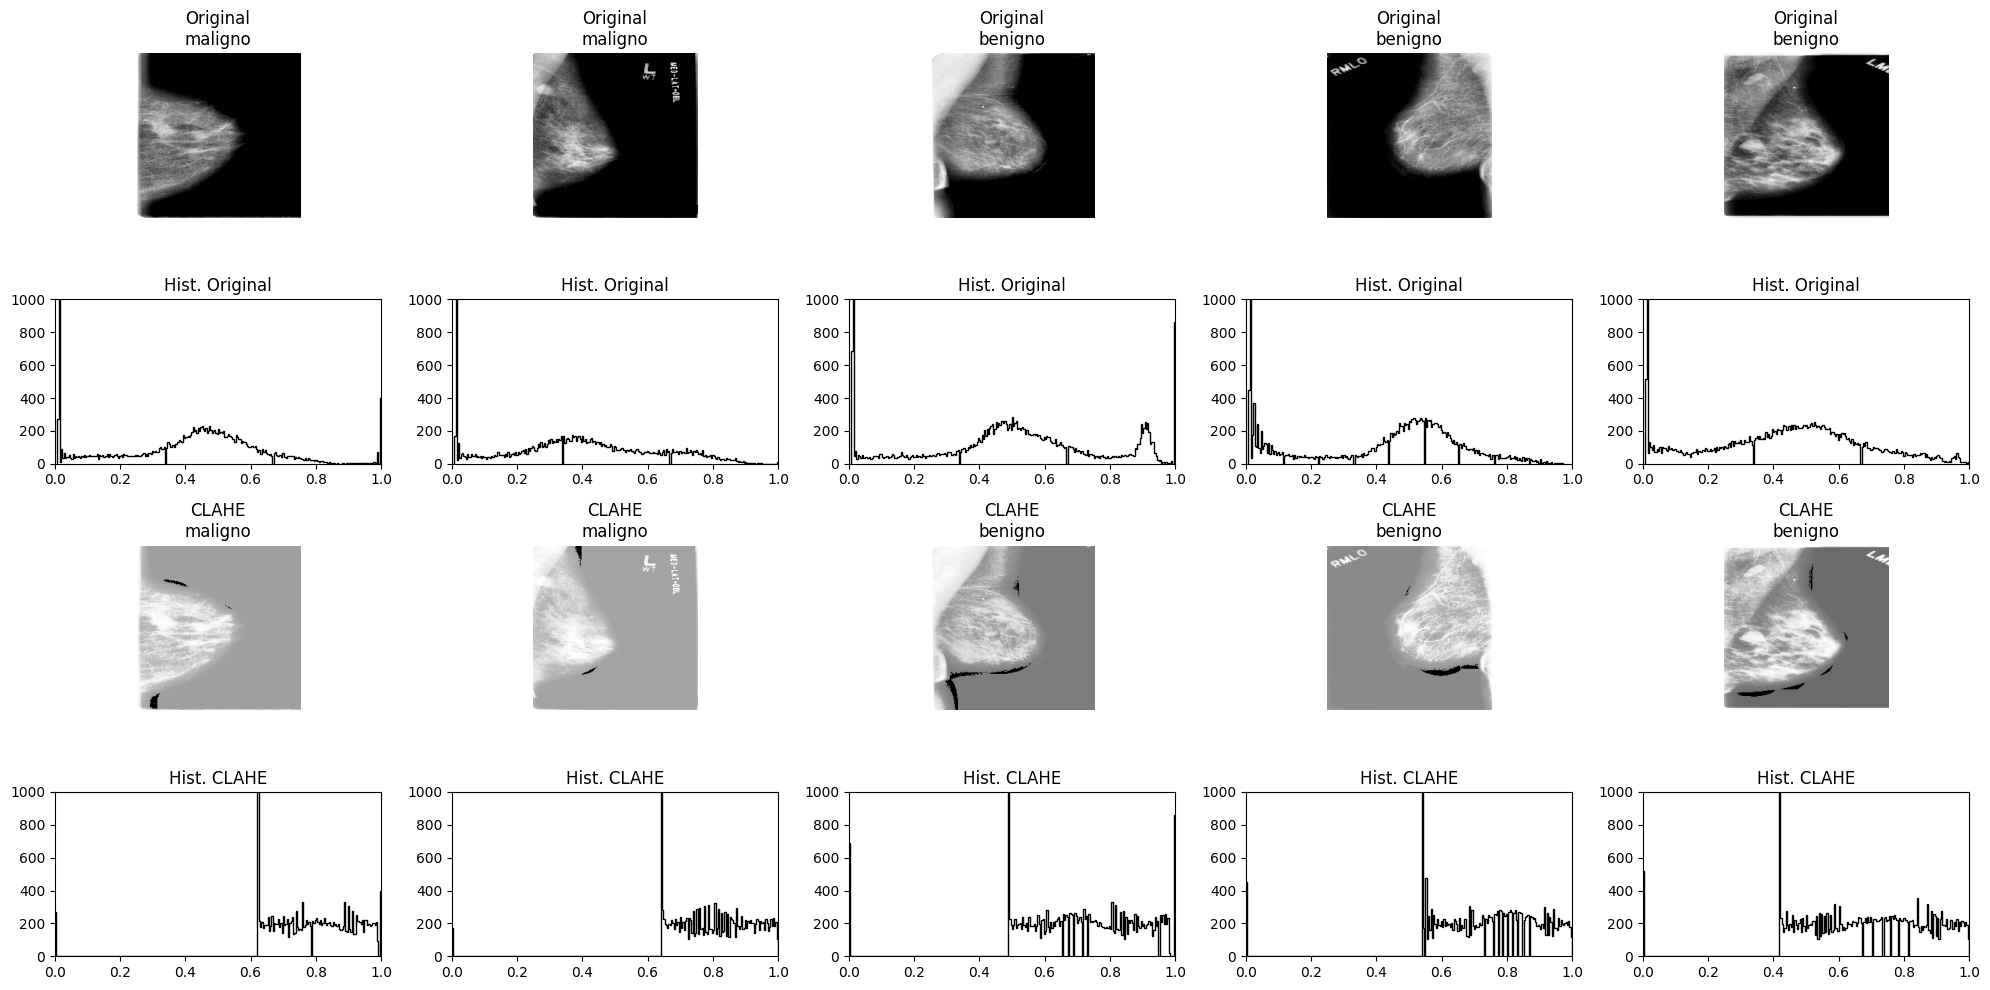

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Asegurarse de que y_test es un array unidimensional con la etiqueta correcta
y_test_labels = y_test[:, 1]

# Definir clases y etiquetas
classes = {0.: 'benigno', 1.: 'maligno'}
labels = [classes[label] for label in y_test_labels]

# Un lote de imágenes de prueba
test_images = X_test

# Seleccionar índices aleatorios
num_images_to_show = min(len(y_test_labels), 5)
random_indices = np.random.choice(len(y_test_labels), num_images_to_show, replace=False)

plt.figure(figsize=(20, 10))
for i, idx in enumerate(random_indices):
    original_image = test_images[idx]
    
    # Asegurarse de que la imagen está en formato uint8
    original_image_uint8 = (original_image * 255).astype(np.uint8)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    imagen_clahe = clahe.apply(original_image_uint8)
    imagen_clahe = imagen_clahe / 255.0  # Normalizar la imagen procesada
    
    # Imagen original
    plt.subplot(4, num_images_to_show, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Original\n{labels[idx]}')
    plt.axis('off')

    # Histograma de la imagen original
    plt.subplot(4, num_images_to_show, i + 1 + num_images_to_show)
    plt.hist(original_image.ravel(), bins=256, histtype='step', color='black')
    plt.title('Hist. Original')
    plt.xlim(0, 1)
    plt.ylim(0, 1000)

    # Imagen con CLAHE
    plt.subplot(4, num_images_to_show, i + 1 + 2 * num_images_to_show)
    plt.imshow(imagen_clahe, cmap='gray')
    plt.title(f'CLAHE\n{labels[idx]}')
    plt.axis('off')

    # Histograma de la imagen con CLAHE
    plt.subplot(4, num_images_to_show, i + 1 + 3 * num_images_to_show)
    plt.hist(imagen_clahe.ravel(), bins=256, histtype='step', color='black')
    plt.title('Hist. CLAHE')
    plt.xlim(0, 1)
    plt.ylim(0, 1000)

plt.tight_layout()
plt.show()
